In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
cic = pd.read_csv("/content/drive/MyDrive/cse366/Car_Insurance_Claim.csv")
cic.drop(['ID', 'OUTCOME'], axis=1, inplace=True)
cic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  10000 non-null  object 
 1   GENDER               10000 non-null  object 
 2   RACE                 10000 non-null  object 
 3   DRIVING_EXPERIENCE   10000 non-null  object 
 4   EDUCATION            10000 non-null  object 
 5   INCOME               10000 non-null  object 
 6   CREDIT_SCORE         9018 non-null   float64
 7   VEHICLE_OWNERSHIP    10000 non-null  float64
 8   VEHICLE_YEAR         10000 non-null  object 
 9   MARRIED              10000 non-null  float64
 10  CHILDREN             10000 non-null  float64
 11  POSTAL_CODE          10000 non-null  int64  
 12  ANNUAL_MILEAGE       9043 non-null   float64
 13  VEHICLE_TYPE         10000 non-null  object 
 14  SPEEDING_VIOLATIONS  10000 non-null  int64  
 15  DUIS                 10000 non-null  

<Axes: >

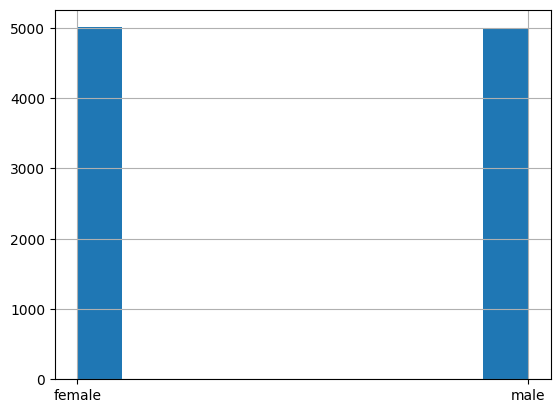

In [4]:
cic["GENDER"].hist()

<ipython-input-8-625fb2b58f80>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cic.corr(), vmin=-1, vmax=1, annot=True);


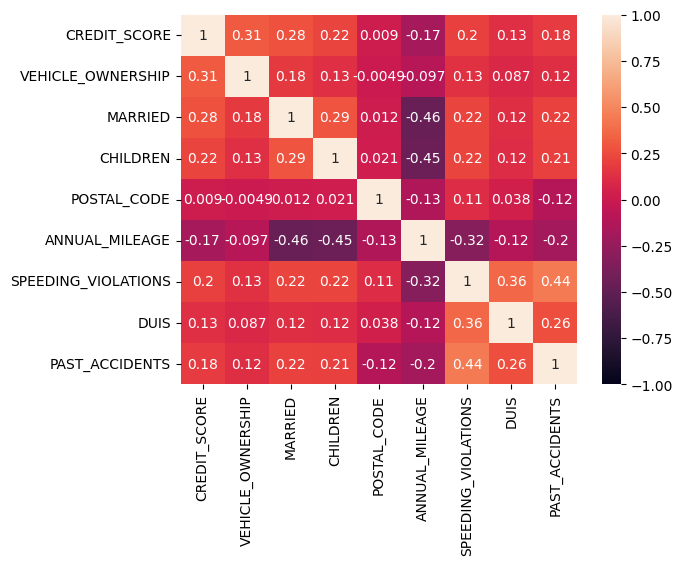

In [8]:
import seaborn as sns
sns.heatmap(cic.corr(), vmin=-1, vmax=1, annot=True);

# **NAIVE BAYES**

In [ ]:

from sklearn.model_selection import train_test_split
newDF = cic.copy()
x = newDF[
    ['AGE', 'GENDER', 'RACE',	'DRIVING_EXPERIENCE',	'EDUCATION', 'INCOME', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP',	'VEHICLE_YEAR',	'MARRIED', 'CHILDREN', 'POSTAL_CODE',	'ANNUAL_MILEAGE',	'VEHICLE_TYPE',	'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS']
    ]
y = newDF[['GENDER']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 15/100, random_state = 10)

In [ ]:
import numpy as np

def naive_bayes(x_train, AGE, RACE,	DRIVING_EXPERIENCE,	EDUCATION,	INCOME,	CREDIT_SCORE,	VEHICLE_OWNERSHIP, VEHICLE_YEAR, MARRIED, CHILDREN, POSTAL_CODE, ANNUAL_MILEAGE, VEHICLE_TYPE, SPEEDING_VIOLATIONS, DUIS, PAST_ACCIDENTS):
  prior_gender_male = x_train[x_train['GENDER'] =='male'].count()[0] / len(x_train)
  prior_gender_female = x_train[x_train['GENDER'] =='female'].count()[0] / len(x_train)

  annual_mil_mean = x_train[x_train['GENDER'] == 'male']['ANNUAL_MILEAGE'].mean()
  annual_mil_std = x_train[x_train['GENDER'] == 'male']['ANNUAL_MILEAGE'].std()
  annual_mil_p = (1 / (np.sqrt(2 * np.pi) * annual_mil_std)) * np.exp(-((ANNUAL_MILEAGE - annual_mil_mean) ** 2 / (2 * annual_mil_std ** 2)))

  CREDIT_SCORE_mean = x_train[x_train['GENDER'] == 'male']['CREDIT_SCORE'].mean()
  CREDIT_SCORE_std = x_train[x_train['GENDER'] == 'male']['CREDIT_SCORE'].std()
  CREDIT_SCORE_p = (1 / (np.sqrt(2 * np.pi) * CREDIT_SCORE_std)) * np.exp(-((CREDIT_SCORE - CREDIT_SCORE_mean) ** 2 / (2 * CREDIT_SCORE_std ** 2)))
  
  annual_mil_mean_fem = x_train[x_train['GENDER'] == 'female']['ANNUAL_MILEAGE'].mean()
  annual_mil_std_fem = x_train[x_train['GENDER'] == 'female']['ANNUAL_MILEAGE'].std()
  annual_mil_p_fem = (1 / (np.sqrt(2 * np.pi) * annual_mil_std_fem)) * np.exp(-((ANNUAL_MILEAGE - annual_mil_mean_fem) ** 2 / (2 * annual_mil_std_fem ** 2)))

  CREDIT_SCORE_mean_fem = x_train[x_train['GENDER'] == 'female']['CREDIT_SCORE'].mean()
  CREDIT_SCORE_std_fem = x_train[x_train['GENDER'] == 'female']['CREDIT_SCORE'].std()
  CREDIT_SCORE_p_fem = (1 / (np.sqrt(2 * np.pi) * CREDIT_SCORE_std_fem)) * np.exp(-((CREDIT_SCORE - CREDIT_SCORE_mean_fem) ** 2 / (2 * CREDIT_SCORE_std_fem ** 2)))

  gender_AGE = x_train[(x_train['AGE'] == AGE) & (x_train['GENDER'] == 'male')].count()[0] / x_train[x_train['GENDER'] == 'male'].count()[0]
  gender_RACE = x_train[(x_train['RACE'] == RACE) & (x_train['GENDER'] == 'male')].count()[0] / x_train[x_train['GENDER'] == 'male'].count()[0]
  gender_DRIVING_EXPERIENCE = x_train[(x_train['DRIVING_EXPERIENCE'] == DRIVING_EXPERIENCE) & (x_train['GENDER']== 'male')].count()[0] / x_train[x_train['GENDER'] == 'male'].count()[0]
  gender_EDUCATION = x_train[(x_train['EDUCATION'] == EDUCATION) & (x_train['GENDER'] == 'male')].count()[0] / x_train[x_train['GENDER'] == 'male'].count()[0]
  gender_INCOME = x_train[(x_train['INCOME'] == INCOME) & (x_train['GENDER'] == 'male')].count()[0] / x_train[x_train['GENDER'] == 'male'].count()[0]
  gender_VEHICLE_OWNERSHIP = x_train[(x_train['VEHICLE_OWNERSHIP'] == VEHICLE_OWNERSHIP) & (x_train['GENDER'] == 'male')].count()[0] / x_train[x_train['GENDER'] == 'male'].count()[0]
  gender_VEHICLE_YEAR = x_train[(x_train['VEHICLE_YEAR'] == VEHICLE_YEAR) & (x_train['GENDER'] == 'male')].count()[0] / x_train[x_train['GENDER'] == 'male'].count()[0]
  gender_MARRIED = x_train[(x_train['MARRIED'] ==	MARRIED) & (x_train['GENDER'] == 'male')].count()[0] / x_train[x_train['GENDER'] == 'male'].count()[0]

  gender_CHILDREN = x_train[(x_train['CHILDREN'] == CHILDREN) & (x_train['GENDER'] == 'male')].count()[0] / x_train[x_train['GENDER'] == 'male'].count()[0]
  gender_POSTAL_CODE = x_train[(x_train['POSTAL_CODE'] == POSTAL_CODE) & (x_train['GENDER'] == 'male')].count()[0] / x_train[x_train['GENDER'] == 'male'].count()[0]
  gender_VEHICLE_TYPE = x_train[(x_train['VEHICLE_TYPE']== 	VEHICLE_TYPE) & (x_train['GENDER']== 'male')].count()[0] / x_train[x_train['GENDER']== 'male'].count()[0]
  gender_SPEEDING_VIOLATIONS = x_train[(x_train['SPEEDING_VIOLATIONS'] == SPEEDING_VIOLATIONS) & (x_train['GENDER'] == 'male')].count()[0] / x_train[x_train['GENDER'] == 'male'].count()[0]
  gender_DUIS = x_train[(x_train['DUIS'] == DUIS) & (x_train['GENDER'] == 'male')].count()[0] / x_train[x_train['GENDER'] == 'male'].count()[0]
  gender_PAST_ACCIDENTS = x_train[(x_train['PAST_ACCIDENTS'] ==	PAST_ACCIDENTS) & (x_train['GENDER'] == 'male')].count()[0] / x_train[x_train['GENDER'] == 'male'].count()[0]

  gender_AGE_fem = x_train[(x_train['AGE'] == AGE) & (x_train['GENDER'] == 'female')].count()[0] / x_train[x_train['GENDER'] == 'female'].count()[0]
  gender_RACE_fem = x_train[(x_train['RACE'] == RACE) & (x_train['GENDER'] == 'female')].count()[0] / x_train[x_train['GENDER'] == 'female'].count()[0]
  gender_DRIVING_EXPERIENCE_fem = x_train[(x_train['DRIVING_EXPERIENCE'] == DRIVING_EXPERIENCE) & (x_train['GENDER'] == 'female')].count()[0] / x_train[x_train['GENDER'] == 'female'].count()[0]
  gender_EDUCATION_fem = x_train[(x_train['EDUCATION'] == EDUCATION) & (x_train['GENDER'] == 'female')].count()[0] / x_train[x_train['GENDER'] == 'female'].count()[0]
  gender_INCOME_fem = x_train[(x_train['INCOME'] == INCOME) & (x_train['GENDER'] == 'female')].count()[0] / x_train[x_train['GENDER'] == 'female'].count()[0]
  gender_VEHICLE_OWNERSHIP_fem = x_train[(x_train['VEHICLE_OWNERSHIP'] == VEHICLE_OWNERSHIP) & (x_train['GENDER']== 'female')].count()[0] / x_train[x_train['GENDER'] == 'female'].count()[0]
  gender_VEHICLE_YEAR_fem = x_train[(x_train['VEHICLE_YEAR']== VEHICLE_YEAR) & (x_train['GENDER']== 'female')].count()[0] / x_train[x_train['GENDER']== 'female'].count()[0]
  gender_MARRIED_fem = x_train[(x_train['MARRIED']== 	MARRIED) & (x_train['GENDER']== 'female')].count()[0] / x_train[x_train['GENDER']== 'female'].count()[0]

  gender_CHILDREN_fem = x_train[(x_train['CHILDREN']== CHILDREN) & (x_train['GENDER']== 'female')].count()[0] / x_train[x_train['GENDER']== 'female'].count()[0]
  gender_POSTAL_CODE_fem = x_train[(x_train['POSTAL_CODE']== POSTAL_CODE) & (x_train['GENDER']== 'female')].count()[0] / x_train[x_train['GENDER']== 'female'].count()[0]
  gender_VEHICLE_TYPE_fem = x_train[(x_train['VEHICLE_TYPE']== 	VEHICLE_TYPE) & (x_train['GENDER']== 'female')].count()[0] / x_train[x_train['GENDER']== 'female'].count()[0]
  gender_SPEEDING_VIOLATIONS_fem = x_train[(x_train['SPEEDING_VIOLATIONS']== SPEEDING_VIOLATIONS) & (x_train['GENDER']== 'female')].count()[0] / x_train[x_train['GENDER']== 'female'].count()[0]
  gender_DUIS_fem = x_train[(x_train['DUIS']== DUIS) & (x_train['GENDER']== 'female')].count()[0] / x_train[x_train['GENDER']== 'female'].count()[0]
  gender_PAST_ACCIDENTS_fem = x_train[(x_train['PAST_ACCIDENTS']== 	PAST_ACCIDENTS) & (x_train['GENDER']== 'female')].count()[0] / x_train[x_train['GENDER']== 'female'].count()[0]


  posterior_male = prior_gender_male * annual_mil_p * CREDIT_SCORE_p * gender_AGE * gender_RACE * gender_DRIVING_EXPERIENCE * gender_EDUCATION * gender_INCOME * gender_VEHICLE_OWNERSHIP * gender_VEHICLE_YEAR * gender_MARRIED * gender_CHILDREN * gender_POSTAL_CODE * gender_VEHICLE_TYPE * gender_SPEEDING_VIOLATIONS * gender_DUIS * gender_PAST_ACCIDENTS
  posterior_female = prior_gender_female * annual_mil_p_fem * CREDIT_SCORE_p_fem * gender_AGE_fem * gender_RACE_fem * gender_DRIVING_EXPERIENCE_fem * gender_EDUCATION_fem * gender_INCOME_fem * gender_VEHICLE_OWNERSHIP_fem * gender_VEHICLE_YEAR_fem * gender_MARRIED_fem * gender_CHILDREN_fem * gender_POSTAL_CODE_fem * gender_VEHICLE_TYPE_fem * gender_SPEEDING_VIOLATIONS_fem * gender_DUIS_fem * gender_PAST_ACCIDENTS_fem

  if posterior_male > posterior_female:
    predicted_quality = 'male'
  else:
    predicted_quality = 'female'

  return predicted_quality

In [ ]:
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
quality_pred = []

for i, data in tqdm(x_test.iterrows()):
  AGE = data['AGE']
  RACE = data['RACE']
  DRIVING_EXPERIENCE = data['DRIVING_EXPERIENCE']
  EDUCATION = data['EDUCATION']
  INCOME = data['INCOME']
  CREDIT_SCORE  = data['CREDIT_SCORE']
  VEHICLE_OWNERSHIP = data['VEHICLE_OWNERSHIP']
  VEHICLE_YEAR = data['VEHICLE_YEAR']
  MARRIED = data['MARRIED']
  CHILDREN = data['CHILDREN']
  POSTAL_CODE = data['POSTAL_CODE']
  ANNUAL_MILEAGE  = data['ANNUAL_MILEAGE']
  VEHICLE_TYPE = data['VEHICLE_TYPE']
  SPEEDING_VIOLATIONS = data['SPEEDING_VIOLATIONS']
  DUIS = data['DUIS']
  PAST_ACCIDENTS = data['PAST_ACCIDENTS']

  pred = naive_bayes(x_train, AGE, RACE,	DRIVING_EXPERIENCE,	EDUCATION,	INCOME,	CREDIT_SCORE,	VEHICLE_OWNERSHIP, VEHICLE_YEAR, MARRIED, CHILDREN, POSTAL_CODE, ANNUAL_MILEAGE, VEHICLE_TYPE, SPEEDING_VIOLATIONS, DUIS, PAST_ACCIDENTS)
  quality_pred.append(pred)


<ipython-input-12-0d8eba775dee>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook as tqdm


0it [00:00, ?it/s]

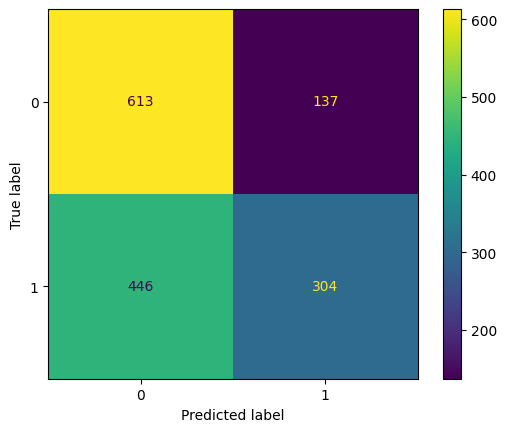

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
y_test_arr = y_test['GENDER'].values
y_pred = np.array(quality_pred)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      female       0.58      0.82      0.68       750
        male       0.69      0.41      0.51       750

    accuracy                           0.61      1500
   macro avg       0.63      0.61      0.59      1500
weighted avg       0.63      0.61      0.59      1500



# **PERCEPTRON**

In [ ]:
df_cat = pd.get_dummies(cic)
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CREDIT_SCORE               9018 non-null   float64
 1   VEHICLE_OWNERSHIP          10000 non-null  float64
 2   MARRIED                    10000 non-null  float64
 3   CHILDREN                   10000 non-null  float64
 4   POSTAL_CODE                10000 non-null  int64  
 5   ANNUAL_MILEAGE             9043 non-null   float64
 6   SPEEDING_VIOLATIONS        10000 non-null  int64  
 7   DUIS                       10000 non-null  int64  
 8   PAST_ACCIDENTS             10000 non-null  int64  
 9   AGE_16-25                  10000 non-null  uint8  
 10  AGE_26-39                  10000 non-null  uint8  
 11  AGE_40-64                  10000 non-null  uint8  
 12  AGE_65+                    10000 non-null  uint8  
 13  GENDER_female              10000 non-null  uint

In [ ]:
df_cat['CREDIT_SCORE'].fillna(value=df_cat['CREDIT_SCORE'].mean(), inplace=True)
df_cat['ANNUAL_MILEAGE'].fillna(value=df_cat['ANNUAL_MILEAGE'].mean(), inplace=True)
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CREDIT_SCORE               10000 non-null  float64
 1   VEHICLE_OWNERSHIP          10000 non-null  float64
 2   MARRIED                    10000 non-null  float64
 3   CHILDREN                   10000 non-null  float64
 4   POSTAL_CODE                10000 non-null  int64  
 5   ANNUAL_MILEAGE             10000 non-null  float64
 6   SPEEDING_VIOLATIONS        10000 non-null  int64  
 7   DUIS                       10000 non-null  int64  
 8   PAST_ACCIDENTS             10000 non-null  int64  
 9   AGE_16-25                  10000 non-null  uint8  
 10  AGE_26-39                  10000 non-null  uint8  
 11  AGE_40-64                  10000 non-null  uint8  
 12  AGE_65+                    10000 non-null  uint8  
 13  GENDER_female              10000 non-null  uint

In [ ]:
df_dropped = df_cat.drop(['GENDER_female', 'GENDER_male'], axis=1)
for column in df_dropped.columns:
  df_dropped[column] = pd.to_numeric(df_dropped[column])
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CREDIT_SCORE               10000 non-null  float64
 1   VEHICLE_OWNERSHIP          10000 non-null  float64
 2   MARRIED                    10000 non-null  float64
 3   CHILDREN                   10000 non-null  float64
 4   POSTAL_CODE                10000 non-null  int64  
 5   ANNUAL_MILEAGE             10000 non-null  float64
 6   SPEEDING_VIOLATIONS        10000 non-null  int64  
 7   DUIS                       10000 non-null  int64  
 8   PAST_ACCIDENTS             10000 non-null  int64  
 9   AGE_16-25                  10000 non-null  uint8  
 10  AGE_26-39                  10000 non-null  uint8  
 11  AGE_40-64                  10000 non-null  uint8  
 12  AGE_65+                    10000 non-null  uint8  
 13  RACE_majority              10000 non-null  uint

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df_dropped_norm = MinMaxScaler().fit_transform(df_dropped)

In [ ]:
from sklearn.model_selection import train_test_split
X = df_dropped_norm
y = df_cat[['GENDER_male']]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0, stratify=y)

In [ ]:
import numpy as np
from tqdm._tqdm_notebook import tqdm_notebook as tqdm

def perceptron(X, y_true, epochs, lr):
    # Initialize weights and bias
    n_features = X.shape[1]
    W = np.random.rand(n_features, 1)
    b = np.random.rand(1)
    z_list = []

    for epoch in tqdm(range(epochs)):
        for x, y in zip(X, y_true.values):
          try:
              # Compute weighted sum
              z = np.dot(x, W) + b
              z_list.append(z)

              # Apply activation function
              y_pred = activation_function(z)

              # Calculate error
              error = y - y_pred

              # Update weights and bias
              delta_w = lr * error * x.reshape(-1, 1)
              delta_b = lr * error

              W += delta_w
              b += delta_b
          except TypeError:
              pass

    return W, b, z_list

def activation_function(x):
    return np.where(x >= 0.5, 1, 0)

epochs = 200
learning_rate = 0.1
weights, bias, z = perceptron(x_train, y_train, epochs, learning_rate)

predictions = activation_function(np.dot(x_test, weights) + bias)

  0%|          | 0/200 [00:00<?, ?it/s]

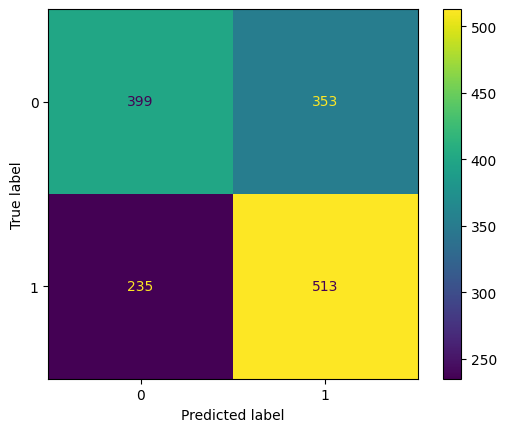

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.63      0.53      0.58       752
           1       0.59      0.69      0.64       748

    accuracy                           0.61      1500
   macro avg       0.61      0.61      0.61      1500
weighted avg       0.61      0.61      0.61      1500

